<a href="https://colab.research.google.com/github/jessica-guan/Python-DataSci-ML/blob/main/Deep%20Learning%20Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework #5: Deep Learning - Review**

---
### **Description**
In this notebook, you will work on a project using Deep Learning to hone your understanding of the Deep Learning fundamentals.

<br>

### **Structure**
**Part 1**: [Analysis of Mineral Hardness](#p1)

> **Part 1.1**: [The Initial Attempt](#p1.1)

> **Part 1.2**: [Improvements](#p1.2)


<br>



### **Learning Objectives**
By the end of this notebook, you will have trained, implemented, evaluated, and fine tuned both deep learning regression and classification models.

<br>


### **Cheat Sheets**
* [Deep Learning with pytorch](https://docs.google.com/document/d/1Wm01maZUrSuwdOhuI05uZBtqt5nL5shOGnJ7kTHWl_I/edit?usp=drive_link)

<br>

**Before starting, run the code below to import all necessary functions and libraries.**


In [ ]:
from keras.models import Sequential
from keras.layers import *
!pip install --quiet keras_visualizer
from keras_visualizer import visualizer
from IPython.display import Image

from keras.optimizers import Adam, SGD
from keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_breast_cancer

<a name="p1"></a>

---
## **Part 1: Analysis of Mineral Hardness**
---

Determining the hardness of minerals is vital for designing materials that may use them. In this section, you will build a regression model to predict the hardness of minerals based on their atomic properties.


<a name="p1.1"></a>

---
### **Part 1.1: The Initial Attempt**
---


#### **Step #1: Import and split the dataset into a train/test set**

**Run the code below to import and split the data.**

In [ ]:
mineral_df = pd.read_csv('https://raw.githubusercontent.com/the-codingschool/TRAIN-datasets/main/material%20Mohs%20hardness/Mineral_Dataset.csv').drop(columns = 'Unnamed: 0')
mineral_df.head()

X = mineral_df.drop('Hardness', axis = 1)
y = mineral_df['Hardness']

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### **Step #2: Determine the dimensions of the data**


**Determine the number of input neurons and if the data needs to be flattened.**

In [ ]:
print("Dimensions of X_train:", X_train.shape)
print("Dimensions of X_test:", X_test.shape)
print("Dimensions of y_train:", y_train.shape)
print("Dimensions of y_test:", y_test.shape)

Dimensions of X_train: (497, 11)
Dimensions of X_test: (125, 11)
Dimensions of y_train: (497,)
Dimensions of y_test: (125,)


#### **Steps #3 - 6: Build the Model**


Build a model sequentially such that there is:

* The Input Layer, flattened if necessary, and correctly sized for receiving inputs.
* No Hidden Layers
* The Output Layer with the correct number of neurons such that we are predicting a continuous number.

In [ ]:
# Define the neural network architecture

# Define input shape based on the number of features in X
input_shape = X_train.shape[1:]

# Create a sequential model
model = Sequential()

# Add input layer (and flatten if necessary)
model.add(Input(shape=input_shape))
model.add(Flatten())

# Add output layer
model.add(Dense(1))  # One neuron for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 11)                0         
                                                                 
 dense (Dense)               (None, 1)                 12        
                                                                 
Total params: 12 (48.00 Byte)
Trainable params: 12 (48.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### **Step #7: Fit the model**

* Use a learning rate of 0.1.
* Use `mse` for both the loss function and evaluation metric.
* Train using 5 epochs and a batch size of 16.


In [ ]:
# Define the optimizer with the specified learning rate
optimizer = Adam(learning_rate=0.1)

# Compile the model with mean squared error loss and evaluation metric
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mse'])

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=16)

Epoch 1/5
32/32 [==============================] - 2s 9ms/step - loss: 1419.4561 - mse: 1419.4561 - val_loss: 31657.1875 - val_mse: 31657.1875
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 33570.3789 - mse: 33570.3789 - val_loss: 11008.7754 - val_mse: 11008.7754
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 2024.9636 - mse: 2024.9636 - val_loss: 8362.6289 - val_mse: 8362.6289
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 15687.8652 - mse: 15687.8652 - val_loss: 3692.2998 - val_mse: 3692.2998
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 2276.9915 - mse: 2276.9915 - val_loss: 8774.0488 - val_mse: 8774.0488


#### **Step #8: Evaluate the model**


In [ ]:
print('MSE: ' + str(model.evaluate(X_test, y_test)))

4/4 [==============================] - 0s 3ms/step - loss: 8774.0488 - mse: 8774.0488
MSE: [8774.048828125, 8774.048828125]


#### **Step #9: Visualize the model's predictions**


Now, run the code below to make predictions with the model and output its predictions for items in the validation set.

4/4 [==============================] - 0s 2ms/step


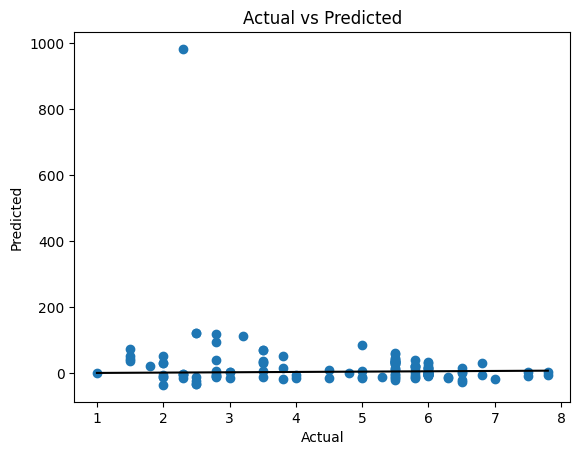

In [ ]:
# Visualize comparison of predictions vs. actual values
pred = model.predict(X_test)

plt.scatter(y_test, pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black')

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

plt.show()

<a name="p1.2"></a>

---
### **Part 1.2: Improvements**
---


Using the template cell provided below, create and train a neural network that is capable of achieving an 85% or higher accuracy on the test dataset for classifying the people.

**Hint:** The first step to improving your work above is adding at least one Hidden Layer. However, you can also consider:
* Changing the number of neurons in each Hidden Layer
* Changing the activation functions in the Hidden Layers
* Changing the activation function in the Output Layer
* Training with a different optimizer
* Training with a different learning rate
* Changing the number of training epochs

In [ ]:
# BUILD
#=======

# Define the neural network architecture
model = Sequential()

# Input layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

# Output layer
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# FIT
#=====

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

# EVALUATE
#==========
print('MSE: ' + str(model.evaluate(X_test, y_test)))

Epoch 1/20
16/16 [==============================] - 2s 14ms/step - loss: -194.9315 - accuracy: 0.0000e+00 - val_loss: -477.0385 - val_accuracy: 0.0080
Epoch 2/20
16/16 [==============================] - 0s 6ms/step - loss: -885.9534 - accuracy: 0.0000e+00 - val_loss: -1683.4591 - val_accuracy: 0.0080
Epoch 3/20
16/16 [==============================] - 0s 5ms/step - loss: -2829.1990 - accuracy: 0.0000e+00 - val_loss: -5243.1021 - val_accuracy: 0.0080
Epoch 4/20
16/16 [==============================] - 0s 5ms/step - loss: -8348.1777 - accuracy: 0.0000e+00 - val_loss: -14425.8838 - val_accuracy: 0.0080
Epoch 5/20
16/16 [==============================] - 0s 6ms/step - loss: -21399.1758 - accuracy: 0.0000e+00 - val_loss: -35161.6914 - val_accuracy: 0.0080
Epoch 6/20
16/16 [==============================] - 0s 6ms/step - loss: -49830.2852 - accuracy: 0.0000e+00 - val_loss: -77261.0859 - val_accuracy: 0.0080
Epoch 7/20
16/16 [==============================] - 0s 5ms/step - loss: -103053.4453 

4/4 [==============================] - 0s 3ms/step


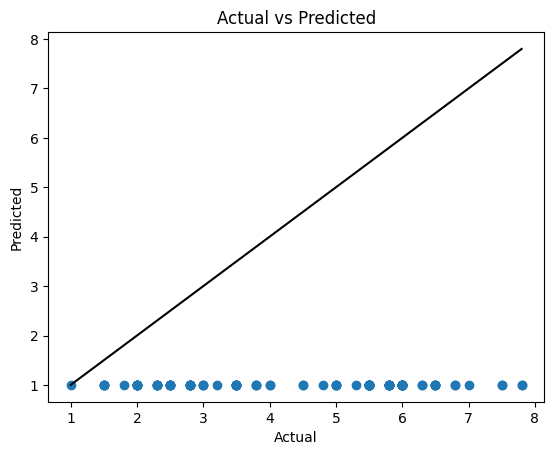

In [ ]:
# Visualize comparison of predictions vs. actual values
pred = model.predict(X_test)

plt.scatter(y_test, pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black')

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

plt.show()

# End of notebook
---

© 2024 The Coding School, All rights reserved